In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import re
import nltk.corpus
from nltk import word_tokenize
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
from string import punctuation

In [3]:
#Load the data
true_news = pd.read_csv('C:/Users/User/Downloads/True.csv')
fake_news = pd.read_csv('C:/Users/User/Downloads/Fake.csv')


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#view the dataset
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#view the dataset
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
#create a new colum label to view thee fake and true news
true_news['label'] = '1'
fake_news['label'] = '0'

In [10]:
df = pd.concat([true_news,fake_news])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [12]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",0
freq,14,627,11272,182,23481


## Data Cleaning process

In [13]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

###  suffle the datas

In [14]:
df = df.sample(frac = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 7913 to 16356
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


###  removing the date and title

In [16]:
df1 = df.drop(['title','date'], axis = 1)

In [17]:
df1

,text,subject,label
7913,"LONDON, Oct 6 (Reuters) - Officials from the U...",politicsNews,1
7952,(Reuters) - Hackers have probed the voting sys...,politicsNews,1
18381,President Trump just made liberal heads explod...,left-news,0
15753,This is like one big slush fund for Hillary 20...,politics,0
15086,Americans are 100% FED Up! with the radical ba...,politics,0
...,...,...,...
5691,"To conservatives, everything is a conspiracy. ...",News,0
20757,MUMBAI (Reuters) - An Indian court on Thursday...,worldnews,1
19538,SEOUL/TOKYO (Reuters) - U.S. President Donald ...,worldnews,1
9390,This is fantastic! President Trump met with al...,politics,0


### 7. Convert to lowercase

In [18]:
#Converting to lowercase
df1['text'] = df1['text'].astype(str).str.lower()
df1['subject'] = df1['subject'].astype(str).str.lower()
df1

,text,subject,label
7913,"london, oct 6 (reuters) - officials from the u...",politicsnews,1
7952,(reuters) - hackers have probed the voting sys...,politicsnews,1
18381,president trump just made liberal heads explod...,left-news,0
15753,this is like one big slush fund for hillary 20...,politics,0
15086,americans are 100% fed up! with the radical ba...,politics,0
...,...,...,...
5691,"to conservatives, everything is a conspiracy. ...",news,0
20757,mumbai (reuters) - an indian court on thursday...,worldnews,1
19538,seoul/tokyo (reuters) - u.s. president donald ...,worldnews,1
9390,this is fantastic! president trump met with al...,politics,0


### 8. Remove punctuation

In [19]:
#Removing punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

df1['text'] = df1['text'].apply(lambda x: strip_punctuation(x))
df1['subject'] = df1['subject'].apply(lambda x: strip_punctuation(x))
df1.head()

,text,subject,label
7913,london oct 6 reuters officials from the us go...,politicsnews,1
7952,reuters hackers have probed the voting system...,politicsnews,1
18381,president trump just made liberal heads explod...,leftnews,0
15753,this is like one big slush fund for hillary 20...,politics,0
15086,americans are 100 fed up with the radical bad ...,politics,0


### 9. Removing stopwords

In [20]:
#Lemmatization with stopwords removal and tokenization
from nltk.corpus import stopwords
#stopwords=stopwords.words('english')
stopwords = stopwords.words('english')



In [21]:
df1.head()

,text,subject,label
7913,london oct 6 reuters officials from the us go...,politicsnews,1
7952,reuters hackers have probed the voting system...,politicsnews,1
18381,president trump just made liberal heads explod...,leftnews,0
15753,this is like one big slush fund for hillary 20...,politics,0
15086,americans are 100 fed up with the radical bad ...,politics,0


### Basic data exploration

In [22]:
#pip install wordcloud

In [23]:
#import packagees
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk.corpus
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer

In [24]:
#Summary Statistics
df1.head()

,text,subject,label
7913,london oct 6 reuters officials from the us go...,politicsnews,1
7952,reuters hackers have probed the voting system...,politicsnews,1
18381,president trump just made liberal heads explod...,leftnews,0
15753,this is like one big slush fund for hillary 20...,politics,0
15086,americans are 100 fed up with the radical bad ...,politics,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 7913 to 16356
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   subject  44898 non-null  object
 2   label    44898 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [26]:
df1.describe

<bound method NDFrame.describe of                                                     text          subject  \
7913   london oct 6 reuters  officials from the us go...     politicsnews   
7952   reuters  hackers have probed the voting system...     politicsnews   
18381  president trump just made liberal heads explod...         leftnews   
15753  this is like one big slush fund for hillary 20...         politics   
15086  americans are 100 fed up with the radical bad ...         politics   
...                                                  ...              ...   
5691   to conservatives everything is a conspiracy an...             news   
20757  mumbai reuters  an indian court on thursday se...        worldnews   
19538  seoultokyo reuters  us president donald trump ...        worldnews   
9390   this is fantastic president trump met with all...         politics   
16356                                                     government news   

      label  
7913      1  
7952      1  

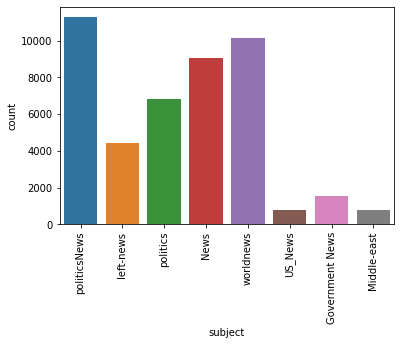

In [27]:
sns.countplot(x='subject',data=df)
plt.xticks(rotation=90)
plt.show()

### 10.  Word cloud for fake news

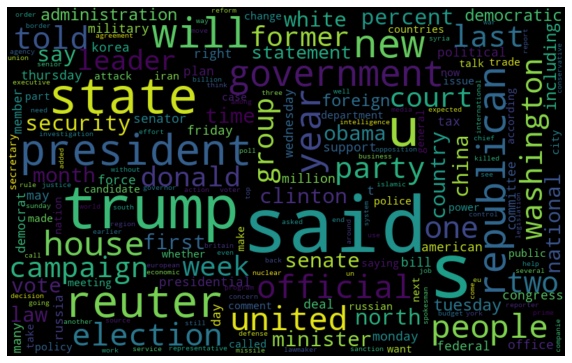

In [28]:
from wordcloud import WordCloud

df2 = df1[df1["label"] == "1"]
all_words = ' '.join([text for text in df2.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

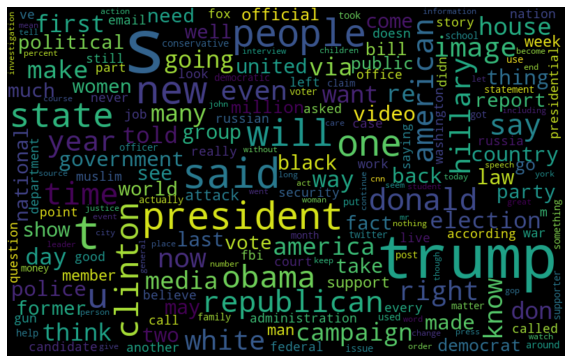

In [29]:
from wordcloud import WordCloud

df2 = df1[df1["label"] == "0"]
all_words = ' '.join([text for text in df2.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

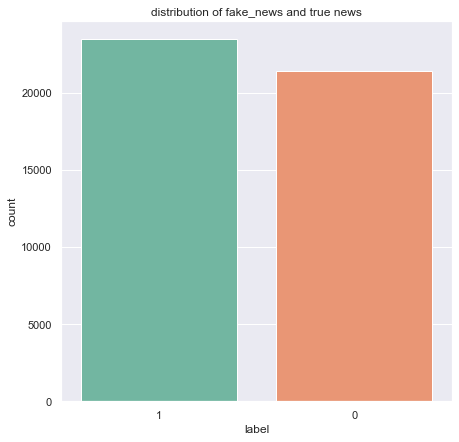

In [30]:
#countplot of True and Fake labels in the data

plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="label", data=df, palette=color)

ax.set(xticklabels=df.label.unique())

plt.title("distribution of fake_news and true news")
plt.show()

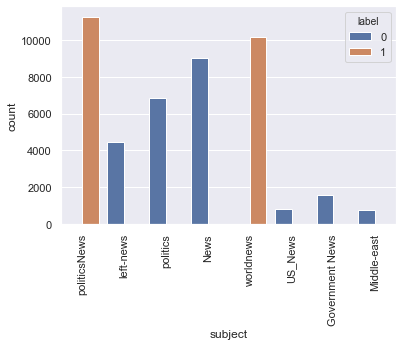

In [31]:
sns.countplot(x='subject',hue='label',data=df)
plt.xticks(rotation=90)
plt.show()

### MODELING


In [32]:
!pip install stop_words

You should consider upgrading via the 'c:\users\user\anaconda3\pythonw.exe -m pip install --upgrade pip' command.


In [33]:
from stop_words import get_stop_words

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time
from sklearn import __version__ as sklearn_version
from sklearn.pipeline import make_pipeline
import os, time
from sklearn.pipeline import Pipeline
#pip install stop_words

### test and splitting the dataset


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1['text'], df1.label, test_size=0.2, random_state = 0)

###  navie bayes


In [35]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.98%


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[4327,  265],
       [ 276, 4112]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,prediction)
ac

0.9397550111358575

###  logistic regression

In [38]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.83%


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[4527,   65],
       [  40, 4348]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,prediction)
ac

0.9883073496659243

### decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.54%


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[4572,   20],
       [  21, 4367]], dtype=int64)

###  SVM

In [43]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



accuracy: 99.59%


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[4567,   25],
       [  12, 4376]], dtype=int64)